In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from math import floor

from env import get_db_url

url = get_db_url('employees')

# For the following problems, use python to simulate the problem and calculate an experimental probability, then compare that to the theoretical probability.

## 1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

In [2]:
stats.poisson(2)

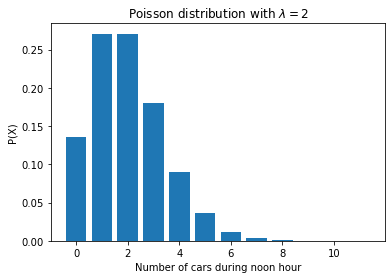

In [3]:
#How do we graph this chart?

λ = 2 

x = np.arange(0, 12)
y = stats.poisson(λ).pmf(x)

plt.bar(x,y)
plt.title('Poisson distribution with $λ = 2$')
plt.xlabel('Number of cars during noon hour')
plt.ylabel('P(X)');

### a. What is the probability that no cars drive up in the noon hour?

In [4]:
stats.poisson(2).pmf(0)

0.1353352832366127

### b. What is the probability that 3 or more cars come through the drive through?

In [5]:
stats.poisson(2).sf(2)

0.32332358381693654

## c. How likely is it that the drive through gets at least 1 car?

In [6]:
stats.poisson(2).sf(0)

0.8646647167633873

## 2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

In [7]:
mean = 3.0
std_dev = .3

grades = stats.norm(mean, std_dev)

### a. What grade point average is required to be in the top 5% of the graduating class?

In [8]:
#I need to remember to include decimals in my percentages.
grades.isf(.05)

3.4934560880854417

### b. What GPA constitutes the bottom 15% of the class?

In [9]:
grades.ppf(.15)

2.689069983151863

### c. An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

In [10]:
top_of_range = grades.ppf(.2)
print(top_of_range)

bottom_of_range = grades.ppf(.3)
print(bottom_of_range)

#A student with a 2.8 GPA would indeed qualify for this scholarship.

2.7475136299281258
2.842679846187588


In [11]:
#You can also type this as follows(returns an array):

grades.ppf([.2, .3])

array([2.74751363, 2.84267985])

### d. If I have a GPA of 3.5, what percentile am I in?

In [12]:
grades.cdf(3.5)

0.9522096477271853

## 3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [13]:
stats.poisson(4326 * .02).sf(96)

0.14211867659283192

In [14]:
#Ravinder's solution:

#binomial distribution:
n = 4326
p = .02

stats.binom(n, p).sf(96)

0.13975823631416445

## 4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundredths place. Looking to save time, you put down random probabilities as the answer to each question.

In [15]:
test = stats.binom(60, .01)

### a. What is the probability that at least one of your first 60 answers is correct?

In [16]:
test.sf(0)

0.45284335760923855

## 5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area.

In [17]:
clean = stats.binom((.9 * 66), .03)

### a. How likely is it that the break area gets cleaned up each day?

In [18]:
clean.sf(0)

0.8362274861228872

### b. How likely is it that it goes two days without getting cleaned up?

In [19]:
#The way I'm thinking about this initially is to find the probability of it not being cleaned for 1 day
clean.cdf(0)

#Then, based on the multiplication rule of probabilities, I would multiply that probability by itself n times for n days. 
#Or, more simply put, I would raise that probability to the n power:
(clean.cdf(0)) ** 2

0.02682143630162909

In [20]:
#Or, I could simply redefine the sample size to include the number of students that would pass through in n days.
clean = stats.binom((.9 * (66 * 2)), .03)

#Here, I'm using 0 as the number of "successes" or how many times the space was cleaned
clean.cdf(0)

0.026821436301629083

### c. All week?

In [21]:
#(defining distribution back to original):
clean = stats.binom((.9 * 66), .03)

#Again, I could make use of the multiplication property:
(clean.cdf(0)) ** 5

0.00011781621791055157

In [22]:
#Or, I could again redefine the sample size to include the number of students passing through in 7 days:
clean = stats.binom((.9 * (66 * 7)), .03)

clean.cdf(0)

3.160000183986709e-06

## 6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [23]:
#defining the distribution:
mean = 15
std_dev = 3

lunch = stats.norm(mean, std_dev)

In [24]:
lunch.cdf(floor((50 - 15) / 2))

0.7475074624530771

## 7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

In [25]:
#Connecting to the database and querying the data

sql = '''
SELECT * FROM salaries
WHERE to_date LIKE '9999%%';
'''

employees = pd.read_sql(sql, url)

In [26]:
#Converting the data to a Dataframe:
employees = pd.DataFrame(employees)

In [27]:
#Getting a quick look at the descriptive stats for the dataframe:
employees.describe()

,emp_no,salary
count,240124.000000,240124.000000
mean,253080.615365,72012.235857
std,161853.087323,17309.995380
min,10001.000000,38623.000000
25%,84878.750000,59048.750000
50%,249792.500000,69805.000000
75%,424895.250000,82546.000000
max,499999.000000,158220.000000


In [28]:
#Defining the distribution:
mean = employees.salary.mean()
std_dev = employees.salary.std()

salary = stats.norm(mean, std_dev)

### a. What percent of employees earn less than 60,000?

In [29]:
salary.cdf(60000)

0.24385742480214423

### b. What percent of employees earn more than 95,000?

In [30]:
salary.sf(95000)

0.09208819199804053

### c. What percent of employees earn between 65,000 and 80,000?

In [31]:
(salary.cdf(80000) - salary.cdf(65000))

0.3350605685446666

### d. What do the top 5% of employees make?

In [32]:
salary.isf(.05)

100484.64454102777